In [30]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [31]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-05-17 15:11:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 2a00:1450:400c:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   103MB/s    in 1.4s    

2020-05-17 15:11:34 (103 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [32]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-05-17 15:11:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-05-17 15:11:37 (106 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip='/tmp/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
train_horse_dir=os.path.join('/tmp/horse-or-human/horses')
train_human_dir=os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [35]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names=os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse34-8.png', 'horse34-6.png', 'horse30-1.png', 'horse32-9.png', 'horse23-9.png', 'horse42-3.png', 'horse17-4.png', 'horse24-6.png', 'horse32-4.png', 'horse20-2.png']
['human17-16.png', 'human12-07.png', 'human15-11.png', 'human10-26.png', 'human11-30.png', 'human06-08.png', 'human09-18.png', 'human10-27.png', 'human11-19.png', 'human07-12.png']
['horse3-099.png', 'horse1-264.png', 'horse5-519.png', 'horse4-232.png', 'horse4-389.png', 'horse1-554.png', 'horse3-198.png', 'horse2-011.png', 'horse5-103.png', 'horse5-076.png']
['valhuman05-01.png', 'valhuman01-21.png', 'valhuman05-06.png', 'valhuman04-22.png', 'valhuman02-13.png', 'valhuman04-05.png', 'valhuman04-13.png', 'valhuman05-07.png', 'valhuman04-04.png', 'valhuman01-12.png']


In [36]:
print('total horses training images: ',len(train_horse_names))
print('total human training image:  ',len(train_human_names))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total horses training images:  500
total human training image:   527
total validation horse images: 128
total validation human images: 128


In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows=4
ncols=4
pic_index=0

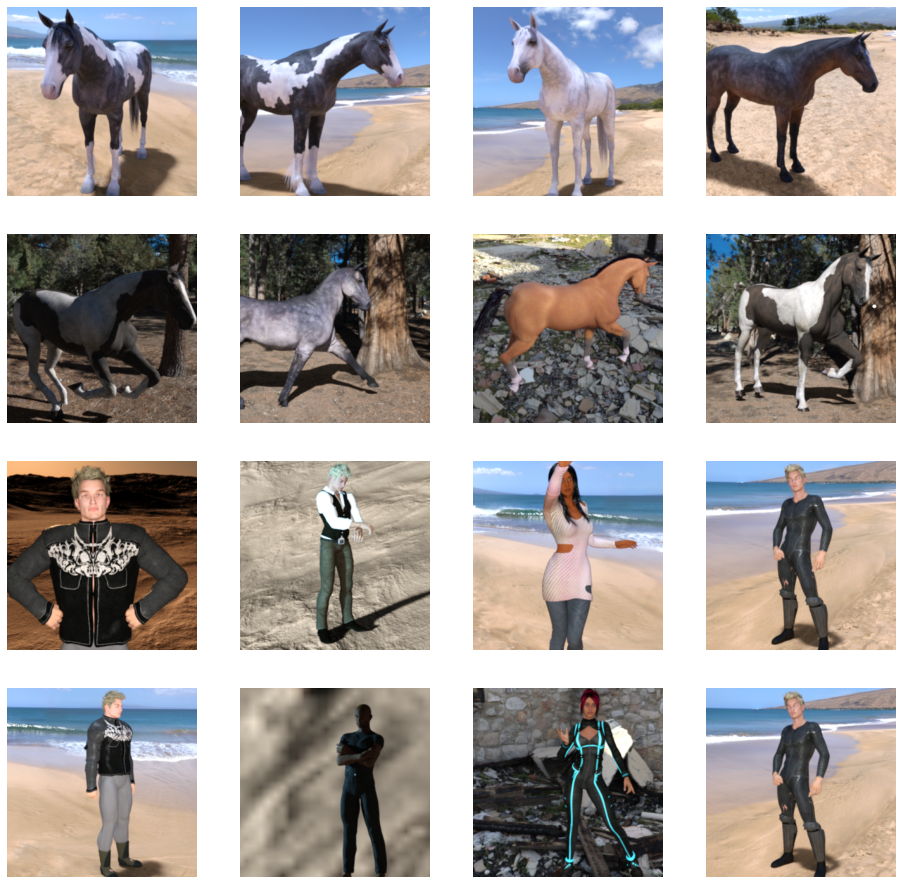

In [38]:
fig=plt.gcf()
fig.set_size_inches(nrows*4,ncols*4,)
pic_index+=8

next_horse_pix=[os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix=[os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [0]:
import tensorflow as tf

In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics='accuracy')

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory('/tmp/horse-or-human',target_size=(300,300),batch_size=128,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory('/tmp/validation-horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [45]:
history=model.fit(train_generator,validation_data = validation_generator,
      validation_steps=8,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 12s 1s/step - loss: 0.1973 - accuracy: 0.9221 - val_loss: 1.5515 - val_accuracy: 0.7578
Epoch 2/15
8/8 [==============================] - 12s 1s/step - loss: 0.2789 - accuracy: 0.8954 - val_loss: 0.5411 - val_accuracy: 0.6592
Epoch 3/15
8/8 [==============================] - 12s 1s/step - loss: 0.1652 - accuracy: 0.9221 - val_loss: 2.2933 - val_accuracy: 0.7109
Epoch 4/15
8/8 [==============================] - 11s 1s/step - loss: 0.1287 - accuracy: 0.9455 - val_loss: 1.9334 - val_accuracy: 0.6514
Epoch 5/15
8/8 [==============================] - 11s 1s/step - loss: 0.0823 - accuracy: 0.9711 - val_loss: 1.6268 - val_accuracy: 0.8125
Epoch 6/15
8/8 [==============================] - 12s 1s/step - loss: 0.0258 - accuracy: 0.9932 - val_loss: 2.0300 - val_accuracy: 0.8115
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.0246 - accuracy: 0.9900 - val_loss: 2.5663 - val_accuracy: 0.7891
Epoch 8/15
8/8 [==================

In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  if classes[0]>0.5:
    print(fn+' is human')
  else:
    print(fn+' is horse')


Saving hr.png to hr.png
Saving hu.jpg to hu (1).jpg
hr.png is horse
hu.jpg is human
